>


<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 32px;">  Smartphone Price Prediction </h1>
</div>


# <div style= "font-family: Cambria; font-weight:bold; letter-spacing: 0px; color:black; font-size:120%; text-align:left;padding:3.0px; background: #cceeff; border-bottom: 8px solid #004466" > TABLE OF CONTENTS<br><div>  
* [LIBRARY IMPORTS](#1)
* [LOAD DATA](#2)
* [Statastical Summary](#3)
* [Encoding](#4) 
* [EDA](#5)
* [Feature Scaling](#6) 
* [Splitting data](#7) 
* [Training and evalution of model](#8) 
* [Splitting data](#7)
* [Model comparison](#8) 
* [Conclusion](#9) 
   

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ukrainian-market-mobile-phones-data/phones_data.csv


<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    LIBRARY IMPORTS
</div>


In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    LOAD DATA
</div>

In [3]:
df = pd.read_csv('/kaggle/input/ukrainian-market-mobile-phones-data/phones_data.csv')
df.head()

,Unnamed: 0,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
0,0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690.0,1529.0,1819.0,36,5.00,8.0,2000.0,10-2020
1,1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
2,2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
3,3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
4,4,Nokia,1.3 1/16GB Charcoal,Android,1047,1999.0,NaN,NaN,10,5.71,16.0,3000.0,4-2020


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1224 non-null   int64  
 1   brand_name      1224 non-null   object 
 2   model_name      1224 non-null   object 
 3   os              1027 non-null   object 
 4   popularity      1224 non-null   int64  
 5   best_price      1224 non-null   float64
 6   lowest_price    964 non-null    float64
 7   highest_price   964 non-null    float64
 8   sellers_amount  1224 non-null   int64  
 9   screen_size     1222 non-null   float64
 10  memory_size     1112 non-null   float64
 11  battery_size    1214 non-null   float64
 12  release_date    1224 non-null   object 
dtypes: float64(6), int64(3), object(4)
memory usage: 124.4+ KB


<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Handling missing data
</div>

In [5]:
df.isnull().sum()

Unnamed: 0          0
brand_name          0
model_name          0
os                197
popularity          0
best_price          0
lowest_price      260
highest_price     260
sellers_amount      0
screen_size         2
memory_size       112
battery_size       10
release_date        0
dtype: int64

# Drop the missing data of size

In [6]:

df.dropna(inplace=True)

In [7]:
df.isnull().sum()

Unnamed: 0        0
brand_name        0
model_name        0
os                0
popularity        0
best_price        0
lowest_price      0
highest_price     0
sellers_amount    0
screen_size       0
memory_size       0
battery_size      0
release_date      0
dtype: int64

In [8]:
df.shape

(780, 13)

<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Statastical Summary
</div>

In [9]:
numerical_summary = df.describe().transpose()
palette = sns.color_palette("viridis", as_cmap=True)
numerical_summary.style.background_gradient(cmap=palette)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,780.000000,635.810256,342.304633,0.000000,374.750000,641.500000,909.250000,1222.000000
popularity,780.000000,729.238462,338.209052,2.000000,475.500000,783.500000,1017.250000,1224.000000
best_price,780.000000,10203.064103,9612.168455,1036.000000,3759.000000,5931.000000,13904.250000,55338.000000
lowest_price,780.000000,9214.326923,8652.375633,899.000000,3499.000000,5547.000000,12425.500000,45799.000000
highest_price,780.000000,11751.229487,11693.361223,1059.000000,3999.000000,6512.500000,16057.750000,64999.000000
sellers_amount,780.000000,20.226923,22.330371,2.000000,4.000000,11.000000,29.000000,125.000000
screen_size,780.000000,6.060462,0.626583,2.400000,5.700000,6.215000,6.500000,8.100000
memory_size,780.000000,112.287179,117.754426,4.000000,32.000000,64.000000,128.000000,1000.000000
battery_size,780.000000,4121.117949,1406.849509,1500.000000,3174.000000,4000.000000,5000.000000,13000.000000


<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Encoding
</div>

In [10]:
drop_col=['release_date','model_name','Unnamed: 0']
df.drop(drop_col,inplace=True,axis=1)
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns]

,brand_name,os
0,ALCATEL,Android
1,ALCATEL,Android
2,ALCATEL,Android
3,ALCATEL,Android
5,Honor,Android
...,...,...
1218,Apple,iOS
1219,Apple,iOS
1220,Apple,iOS
1221,HUAWEI,Android


In [11]:
df[object_columns]

,brand_name,os
0,ALCATEL,Android
1,ALCATEL,Android
2,ALCATEL,Android
3,ALCATEL,Android
5,Honor,Android
...,...,...
1218,Apple,iOS
1219,Apple,iOS
1220,Apple,iOS
1221,HUAWEI,Android


In [12]:
for column in object_columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()

Unique values in 'brand_name':
['ALCATEL' 'Honor' 'Meizu' 'Nokia' 'OnePlus' 'realme' 'AGM' 'OPPO'
 'Blackview' 'Lenovo' 'UMIDIGI' 'Sharp' 'Ulefone' 'DOOGEE' 'Xiaomi' 'ZTE'
 'Oukitel' 'Cubot' 'Tecno' 'Coolpad' 'Archos' '2E' 'Motorola' 'LG'
 'Samsung' 'BlackBerry' 'HUAWEI' 'Vernee' 'Google' 'ASUS' 'Bluboo' 'CAT'
 'Philips' 'Vodafone' 'Microsoft' 'Elephone' 'HTC' 'vivo' 'Sigma mobile'
 'Sony' 'LEAGOO' 'Apple']

Unique values in 'os':
['Android' 'iOS' 'OxygenOS' 'EMUI' 'KAIOS']



# One-Hot encoding

In [13]:
df1 = pd.get_dummies(df, columns=object_columns)

In [14]:
df1

,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,brand_name_2E,brand_name_AGM,...,brand_name_Vodafone,brand_name_Xiaomi,brand_name_ZTE,brand_name_realme,brand_name_vivo,os_Android,os_EMUI,os_KAIOS,os_OxygenOS,os_iOS
0,422,1690.0,1529.0,1819.0,36,5.00,8.0,2000.0,False,False,...,False,False,False,False,False,True,False,False,False,False
1,323,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,False,False,...,False,False,False,False,False,True,False,False,False,False
2,299,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,False,False,...,False,False,False,False,False,True,False,False,False,False
3,287,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,False,False,...,False,False,False,False,False,True,False,False,False,False
5,71,10865.0,10631.0,11099.0,2,5.80,64.0,3400.0,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,842,27190.0,21150.0,30200.0,47,6.50,512.0,3174.0,False,False,...,False,False,False,False,False,False,False,False,False,True
1219,1101,22685.0,16018.0,27900.0,61,6.50,64.0,3174.0,False,False,...,False,False,False,False,False,False,False,False,False,True
1220,530,24600.0,21939.0,33720.0,28,6.50,64.0,3174.0,False,False,...,False,False,False,False,False,False,False,False,False,True
1221,1174,8804.0,7999.0,9999.0,18,6.26,128.0,3750.0,False,False,...,False,False,False,False,False,True,False,False,False,False


In [15]:
df1.shape

(780, 55)

<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    EDA
</div>

<Axes: >

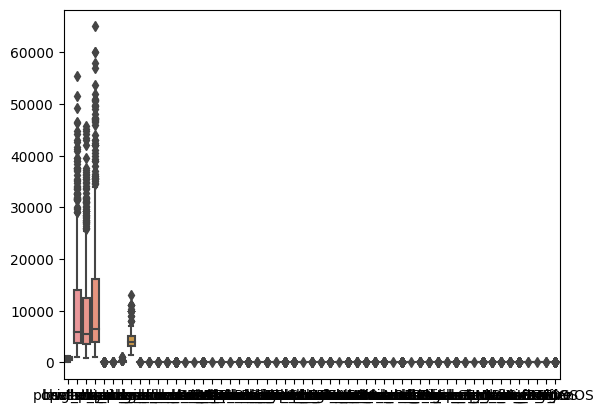

In [16]:
sns.boxplot(df1)

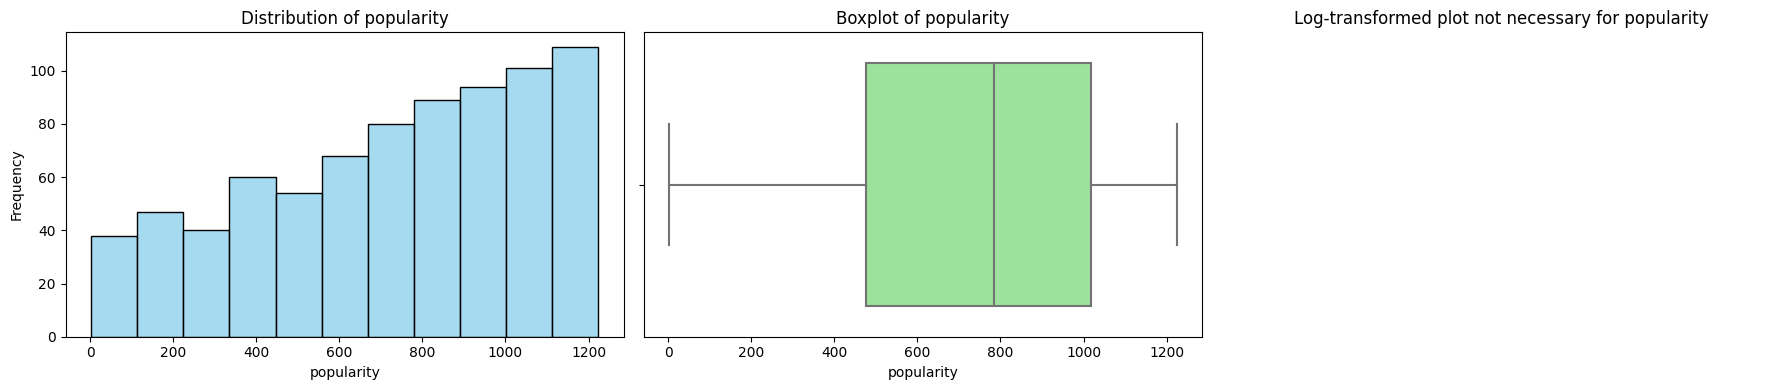

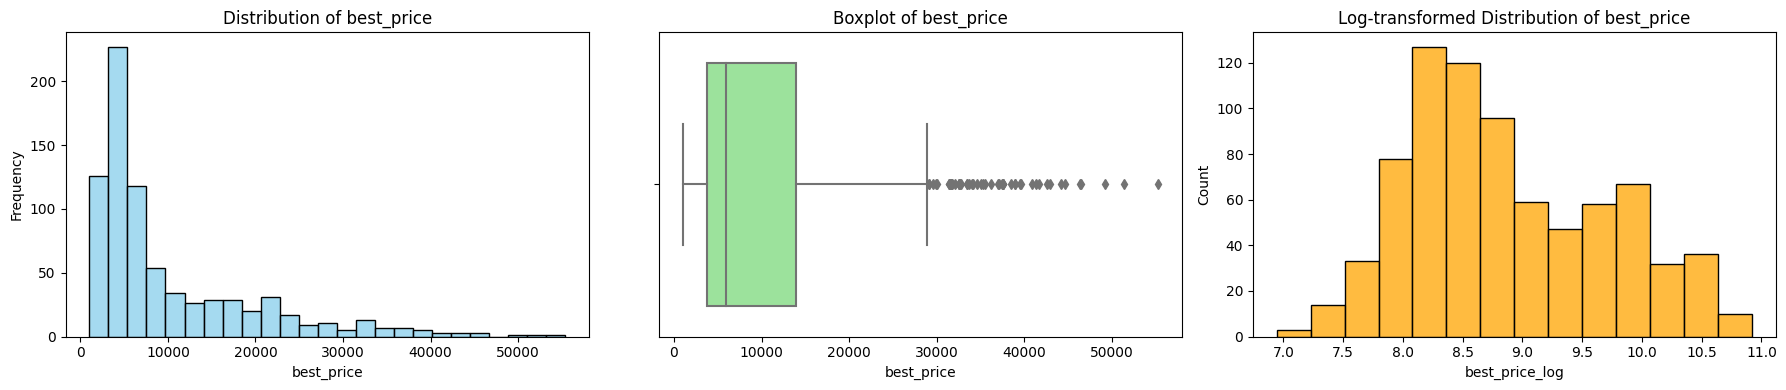

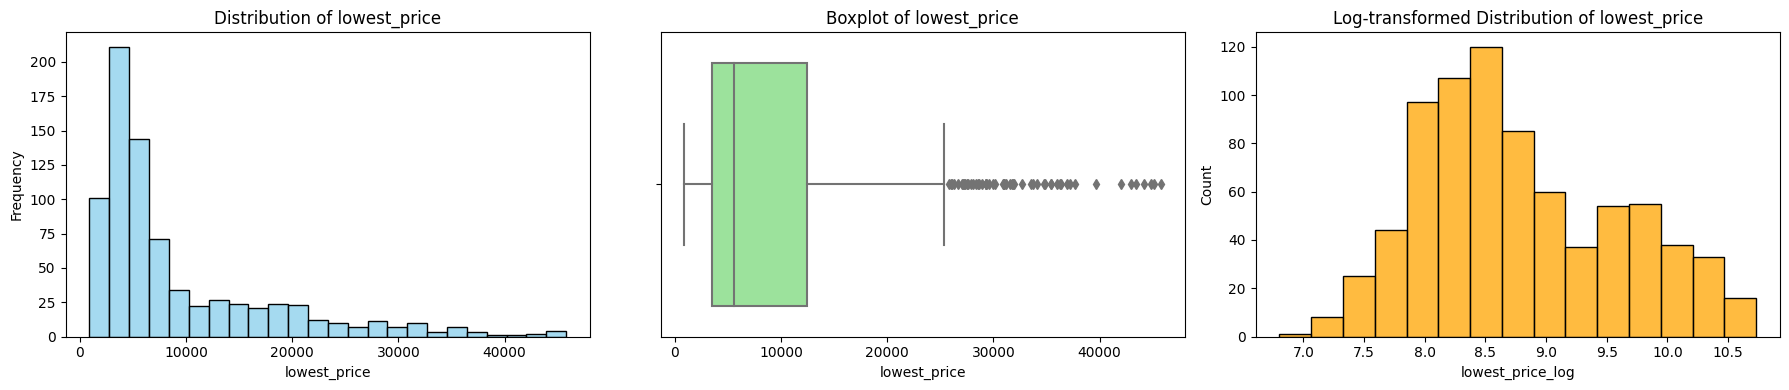

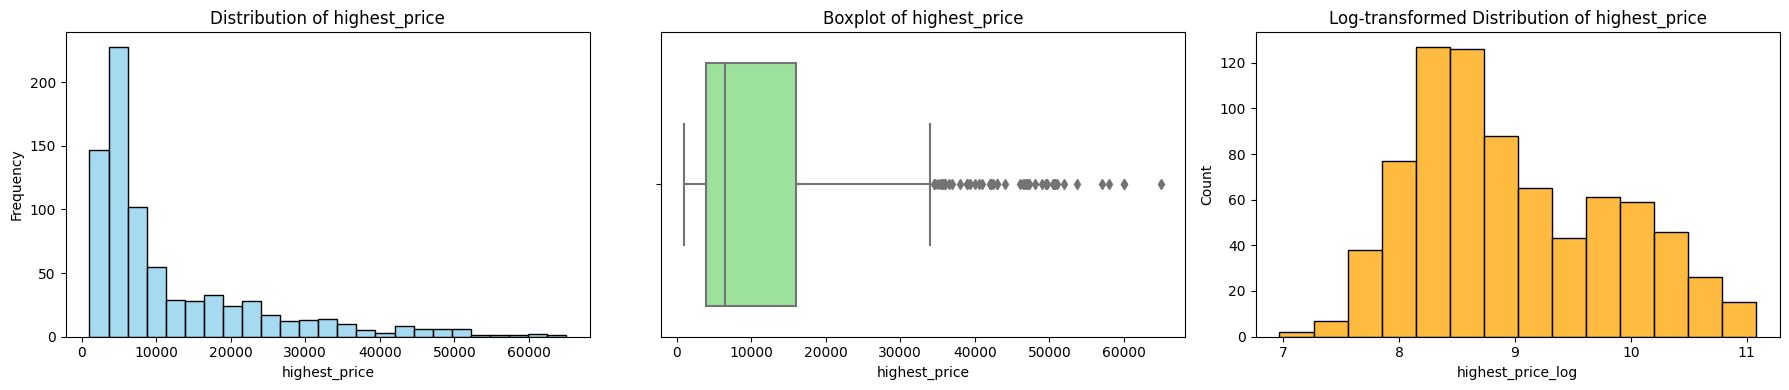

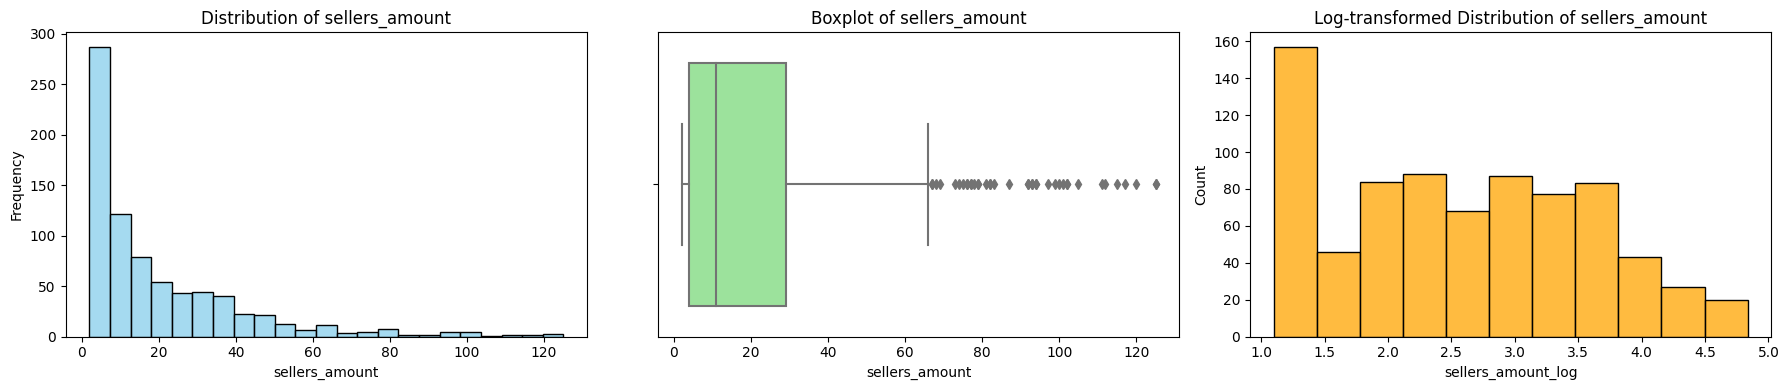

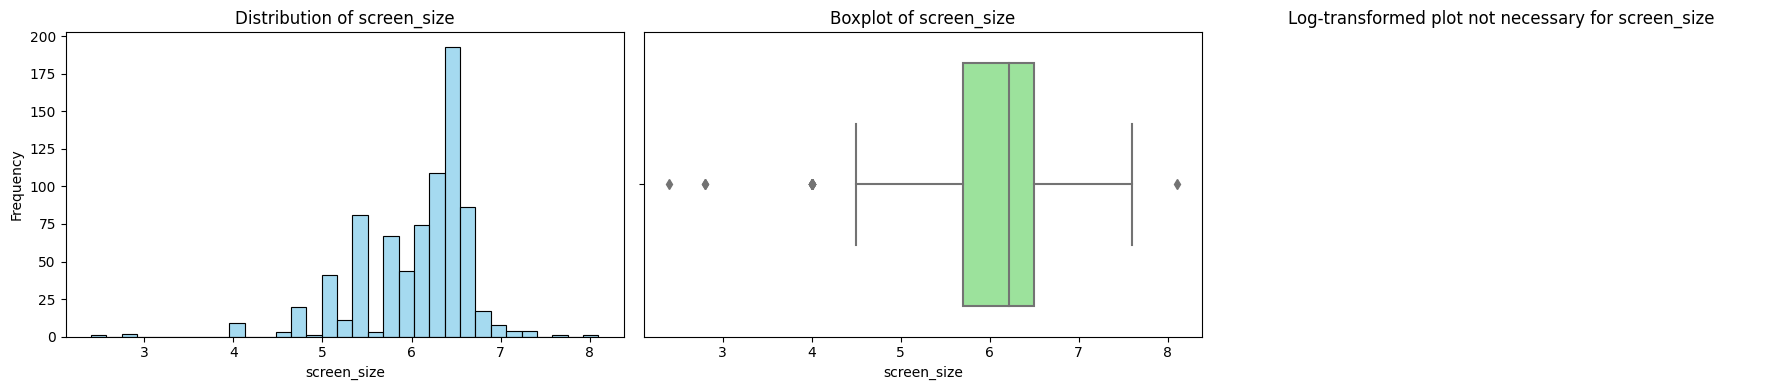

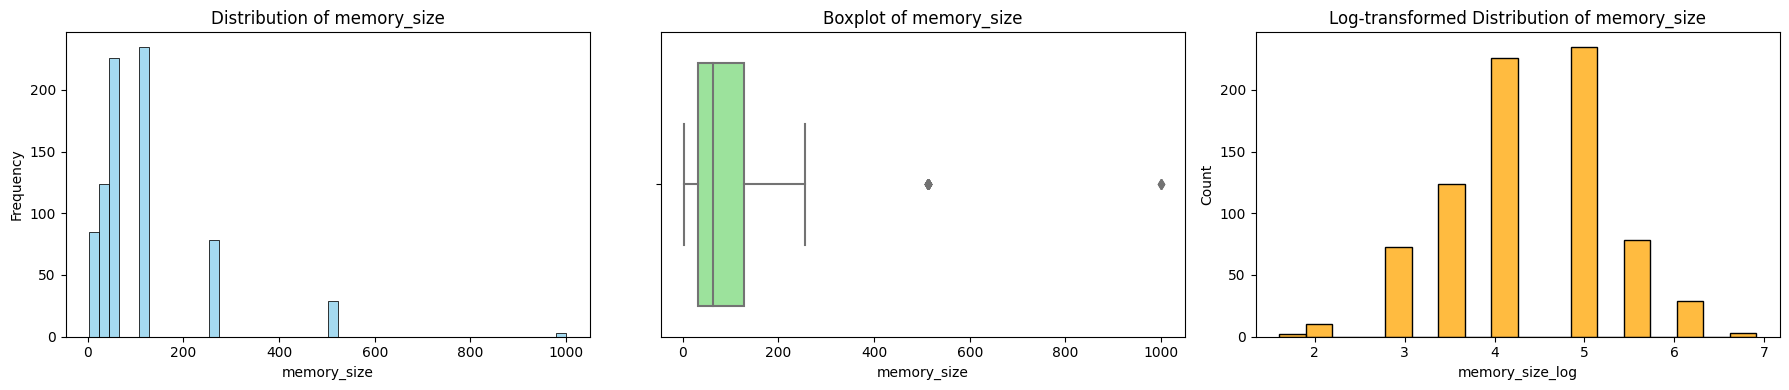

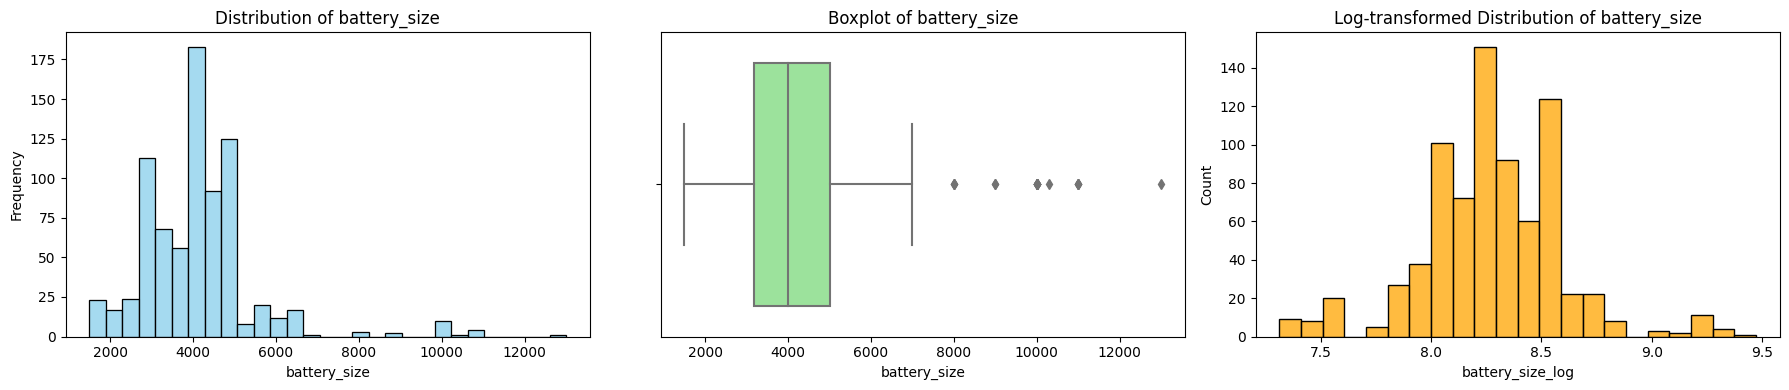

In [17]:
import matplotlib.pyplot as plt
import numpy as np
non_boolean_numerical_features = ["popularity",'best_price','lowest_price','highest_price','sellers_amount','screen_size','memory_size','battery_size']

# Get all boolean columns
boolean_columns = df.select_dtypes(include=['bool']).columns.tolist()

# Filter out non-boolean numerical features
boolean_features_except_numerical = [col for col in boolean_columns if col not in non_boolean_numerical_features]
# Visualize the distributions and box plots for numerical features, including log-transformed versions for skewed data
for column in non_boolean_numerical_features:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))

    # Histogram for the distribution
    sns.histplot(df1[column], kde=False, color='skyblue', ax=ax1)
    ax1.set_title(f'Distribution of {column}')
    ax1.set_ylabel('Frequency')

    # Boxplot for the variable
    sns.boxplot(x=df1[column], color='lightgreen', ax=ax2)
    ax2.set_title(f'Boxplot of {column}')

    # Log transformation and plot if the data is skewed
    if df1[column].skew() > 1:
        df1[column+'_log'] = np.log1p(df1[column])
        sns.histplot(df1[column+'_log'], kde=False, color='orange', ax=ax3)
        ax3.set_title(f'Log-transformed Distribution of {column}')
    else:
        ax3.set_title(f'Log-transformed plot not necessary for {column}')
        ax3.axis('off')

    plt.tight_layout()
    plt.show()


<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 15px;"> we can not consider these outlier for above feature. </h1>
</div>

<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Feature Scaling
</div>

In [18]:
from sklearn.preprocessing import MinMaxScaler
non_boolean_numerical_features = ["popularity",'best_price','lowest_price','highest_price','sellers_amount','screen_size','memory_size','battery_size']
scaler = MinMaxScaler()
df1[non_boolean_numerical_features] = scaler.fit_transform(df1[non_boolean_numerical_features])


In [19]:
df1

,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,brand_name_2E,brand_name_AGM,...,os_EMUI,os_KAIOS,os_OxygenOS,os_iOS,best_price_log,lowest_price_log,highest_price_log,sellers_amount_log,memory_size_log,battery_size_log
0,0.343699,0.012044,0.014031,0.011886,0.276423,0.456140,0.004016,0.043478,False,False,...,False,False,False,False,7.433075,7.333023,7.506592,3.610918,2.197225,7.601402
1,0.262684,0.014125,0.016927,0.022365,0.276423,0.456140,0.012048,0.043478,False,False,...,False,False,False,False,7.497762,7.414573,7.820038,3.610918,2.833213,7.601402
2,0.243044,0.014125,0.016927,0.022365,0.276423,0.456140,0.012048,0.043478,False,False,...,False,False,False,False,7.497762,7.414573,7.820038,3.610918,2.833213,7.601402
3,0.233224,0.014125,0.016927,0.022365,0.276423,0.456140,0.012048,0.043478,False,False,...,False,False,False,False,7.497762,7.414573,7.820038,3.610918,2.833213,7.601402
5,0.056465,0.181006,0.216748,0.157022,0.000000,0.596491,0.060241,0.165217,False,False,...,False,False,False,False,9.293394,9.271624,9.314700,1.098612,4.174387,8.131825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,0.687398,0.481640,0.451024,0.455755,0.365854,0.719298,0.510040,0.145565,False,False,...,False,False,False,True,10.210641,9.959442,10.315630,3.871201,6.240276,8.063063
1219,0.899345,0.398678,0.336726,0.419784,0.479675,0.719298,0.060241,0.145565,False,False,...,False,False,False,True,10.029503,9.681531,10.236418,4.127134,4.174387,8.063063
1220,0.432079,0.433944,0.468597,0.510807,0.211382,0.719298,0.060241,0.145565,False,False,...,False,False,False,True,10.110542,9.996067,10.425876,3.367296,4.174387,8.063063
1221,0.959083,0.143052,0.158129,0.139819,0.130081,0.677193,0.124498,0.195652,False,False,...,False,False,False,False,9.083075,8.987197,9.210340,2.944439,4.859812,8.229778


For regression tasks where the target variable is continuous, it's generally not necessary to scale the target variable. Algorithms like Linear Regression, Decision Trees, Random Forest, and Gradient Boosting Machines can handle continuous target variables without requiring scaling.

if you're using algorithms that are sensitive to the scale of the target variable, such as Support Vector Machines (SVM) with a regression (SVR) or NuSVR kernel, you might consider scaling the target variable

In [20]:
y_scaled = df1['best_price']
y_scaled

0       0.012044
1       0.014125
2       0.014125
3       0.014125
5       0.181006
          ...   
1218    0.481640
1219    0.398678
1220    0.433944
1221    0.143052
1222    0.326305
Name: best_price, Length: 780, dtype: float64

In [21]:
df1

,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,brand_name_2E,brand_name_AGM,...,os_EMUI,os_KAIOS,os_OxygenOS,os_iOS,best_price_log,lowest_price_log,highest_price_log,sellers_amount_log,memory_size_log,battery_size_log
0,0.343699,0.012044,0.014031,0.011886,0.276423,0.456140,0.004016,0.043478,False,False,...,False,False,False,False,7.433075,7.333023,7.506592,3.610918,2.197225,7.601402
1,0.262684,0.014125,0.016927,0.022365,0.276423,0.456140,0.012048,0.043478,False,False,...,False,False,False,False,7.497762,7.414573,7.820038,3.610918,2.833213,7.601402
2,0.243044,0.014125,0.016927,0.022365,0.276423,0.456140,0.012048,0.043478,False,False,...,False,False,False,False,7.497762,7.414573,7.820038,3.610918,2.833213,7.601402
3,0.233224,0.014125,0.016927,0.022365,0.276423,0.456140,0.012048,0.043478,False,False,...,False,False,False,False,7.497762,7.414573,7.820038,3.610918,2.833213,7.601402
5,0.056465,0.181006,0.216748,0.157022,0.000000,0.596491,0.060241,0.165217,False,False,...,False,False,False,False,9.293394,9.271624,9.314700,1.098612,4.174387,8.131825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,0.687398,0.481640,0.451024,0.455755,0.365854,0.719298,0.510040,0.145565,False,False,...,False,False,False,True,10.210641,9.959442,10.315630,3.871201,6.240276,8.063063
1219,0.899345,0.398678,0.336726,0.419784,0.479675,0.719298,0.060241,0.145565,False,False,...,False,False,False,True,10.029503,9.681531,10.236418,4.127134,4.174387,8.063063
1220,0.432079,0.433944,0.468597,0.510807,0.211382,0.719298,0.060241,0.145565,False,False,...,False,False,False,True,10.110542,9.996067,10.425876,3.367296,4.174387,8.063063
1221,0.959083,0.143052,0.158129,0.139819,0.130081,0.677193,0.124498,0.195652,False,False,...,False,False,False,False,9.083075,8.987197,9.210340,2.944439,4.859812,8.229778


In [22]:
x = df1.drop(['best_price','highest_price','lowest_price'],axis=1)
x

,popularity,sellers_amount,screen_size,memory_size,battery_size,brand_name_2E,brand_name_AGM,brand_name_ALCATEL,brand_name_ASUS,brand_name_Apple,...,os_EMUI,os_KAIOS,os_OxygenOS,os_iOS,best_price_log,lowest_price_log,highest_price_log,sellers_amount_log,memory_size_log,battery_size_log
0,0.343699,0.276423,0.456140,0.004016,0.043478,False,False,True,False,False,...,False,False,False,False,7.433075,7.333023,7.506592,3.610918,2.197225,7.601402
1,0.262684,0.276423,0.456140,0.012048,0.043478,False,False,True,False,False,...,False,False,False,False,7.497762,7.414573,7.820038,3.610918,2.833213,7.601402
2,0.243044,0.276423,0.456140,0.012048,0.043478,False,False,True,False,False,...,False,False,False,False,7.497762,7.414573,7.820038,3.610918,2.833213,7.601402
3,0.233224,0.276423,0.456140,0.012048,0.043478,False,False,True,False,False,...,False,False,False,False,7.497762,7.414573,7.820038,3.610918,2.833213,7.601402
5,0.056465,0.000000,0.596491,0.060241,0.165217,False,False,False,False,False,...,False,False,False,False,9.293394,9.271624,9.314700,1.098612,4.174387,8.131825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,0.687398,0.365854,0.719298,0.510040,0.145565,False,False,False,False,True,...,False,False,False,True,10.210641,9.959442,10.315630,3.871201,6.240276,8.063063
1219,0.899345,0.479675,0.719298,0.060241,0.145565,False,False,False,False,True,...,False,False,False,True,10.029503,9.681531,10.236418,4.127134,4.174387,8.063063
1220,0.432079,0.211382,0.719298,0.060241,0.145565,False,False,False,False,True,...,False,False,False,True,10.110542,9.996067,10.425876,3.367296,4.174387,8.063063
1221,0.959083,0.130081,0.677193,0.124498,0.195652,False,False,False,False,False,...,False,False,False,False,9.083075,8.987197,9.210340,2.944439,4.859812,8.229778


<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Splitting data
</div>

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y_scaled, test_size=0.2, random_state=42)

In [24]:
X_train

,popularity,sellers_amount,screen_size,memory_size,battery_size,brand_name_2E,brand_name_AGM,brand_name_ALCATEL,brand_name_ASUS,brand_name_Apple,...,os_EMUI,os_KAIOS,os_OxygenOS,os_iOS,best_price_log,lowest_price_log,highest_price_log,sellers_amount_log,memory_size_log,battery_size_log
1127,0.577741,0.154472,0.596491,0.253012,0.146957,False,False,False,False,True,...,False,False,False,True,10.419480,10.348173,10.545447,3.091042,5.549076,8.068090
1011,0.736498,0.040650,0.708772,0.253012,0.234783,False,False,False,False,False,...,False,False,False,False,9.601436,9.577134,9.631679,2.079442,5.549076,8.343078
248,0.270049,0.097561,0.684211,0.124498,0.441739,False,False,False,False,False,...,False,False,False,False,9.216819,9.186150,9.259131,2.708050,4.859812,8.791942
571,0.188216,0.040650,0.719298,0.028112,0.217391,False,False,False,False,False,...,False,False,False,False,8.105609,8.039157,8.160518,2.079442,3.496508,8.294300
124,0.945172,0.268293,0.728070,0.124498,0.260870,False,False,False,False,False,...,False,False,False,False,9.731869,9.698920,9.798183,3.583519,4.859812,8.412055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,0.893617,0.512195,0.719298,0.060241,0.304348,False,False,False,False,False,...,False,False,False,False,8.603187,8.488382,8.704834,4.189655,4.174387,8.517393
220,0.709493,0.089431,0.578947,0.060241,0.354783,False,False,False,False,False,...,False,False,False,False,8.153350,8.111928,8.221479,2.639057,4.174387,8.627123
461,0.132570,0.008130,0.701754,0.510040,0.217391,False,False,False,False,False,...,False,False,False,False,9.949846,9.926716,9.992963,1.386294,6.240276,8.294300
717,0.648118,0.186992,0.543860,0.012048,0.078261,False,False,False,False,False,...,False,False,False,False,7.397562,7.299797,7.438384,3.258097,2.833213,7.783641


In [25]:
y_train

1127    0.597934
1011    0.253195
248     0.166255
571     0.041914
124     0.291131
          ...   
162     0.081249
220     0.044897
461     0.366690
717     0.010957
205     0.046297
Name: best_price, Length: 624, dtype: float64

<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Training and evalution of model
</div>

<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 25px;"> LinearRegression </h1>
</div>


In [26]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)



LinearRegression()

In [27]:
y_pred_train = linear_reg.predict(X_train)
y_pred_test = linear_reg.predict(X_test)



In [28]:
# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 0.0037429416039881968
Testing MSE: 9.825571463526461e+22
Training R2 Score: 0.8849896977223636
Testing R2 Score: -3.771669170404454e+24


<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 25px;"> KNN </h1>
</div>

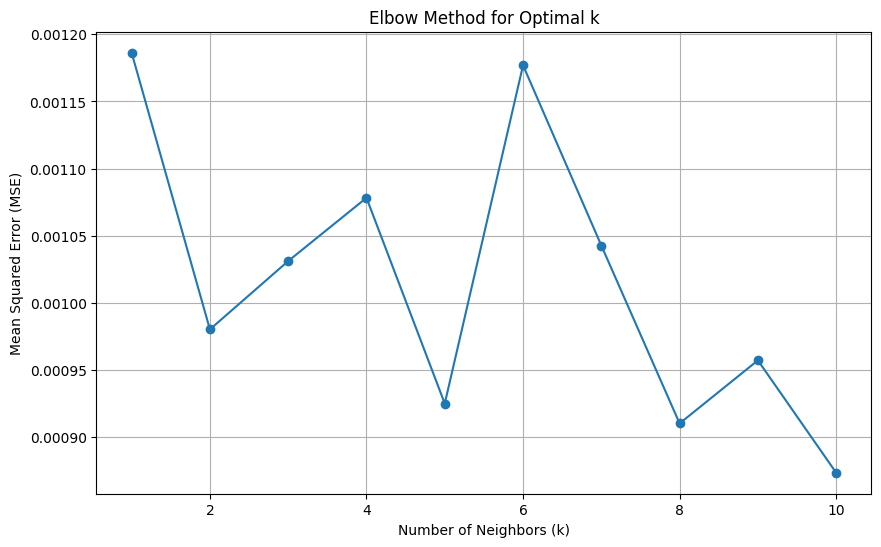

In [29]:
mse_values = []
r2_values = []
max_neighbors = 10  
for k in range(1, max_neighbors + 1):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_values.append(mse)
    r2_values.append(r2)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_neighbors + 1), mse_values, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()



In [30]:
# Choose the optimal k based on the elbow curve (lowest MSE)
optimal_k = mse_values.index(min(mse_values)) + 1
print(f"Optimal number of neighbors (k): {optimal_k}")



Optimal number of neighbors (k): 10


In [31]:
# Train the KNN model with the optimal k
knn = KNeighborsRegressor(n_neighbors=optimal_k)
knn.fit(X_train, y_train)



KNeighborsRegressor(n_neighbors=10)

In [32]:
# Evaluate the model
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)



In [33]:
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 0.001323503481298416
Testing MSE: 0.0008735053460623848
Training R2 Score: 0.9593323776979463
Testing R2 Score: 0.9664693987911362


<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 25px;"> DecisionTreeRegressor </h1>
</div>

In [34]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, export_graphviz

# Define the hyperparameters grid
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree model
dt_regressor = DecisionTreeRegressor(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the model with hyperparameter tuning
grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error', verbose=1)

In [35]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the Decision Tree model with the best hyperparameters
best_dt_regressor = DecisionTreeRegressor(**best_params)
best_dt_regressor.fit(X_train, y_train)




Best Hyperparameters: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}


DecisionTreeRegressor(max_depth=7)

In [36]:
# Make predictions
y_pred_train = best_dt_regressor.predict(X_train)
y_pred_test = best_dt_regressor.predict(X_test)



In [37]:
# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")



Training MSE: 1.4115207649566552e-06
Testing MSE: 6.777329735945267e-06
Training R2 Score: 0.9999566278486216
Testing R2 Score: 0.9997398436750715


<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 25px;"> RandomForestRegressor </h1>
</div>

In [38]:

from sklearn.ensemble import RandomForestRegressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf_regressor = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the model with hyperparameter tuning
grid_search.fit(X_train, y_train)




Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [39]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the Random Forest model with the best hyperparameters
best_rf_regressor = RandomForestRegressor(**best_params)
best_rf_regressor.fit(X_train, y_train)



Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


RandomForestRegressor()

In [40]:
# Make predictions
y_pred_train = best_rf_regressor.predict(X_train)
y_pred_test = best_rf_regressor.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 4.6168042202205784e-06
Testing MSE: 2.905230663647575e-06
Training R2 Score: 0.9998581383026766
Testing R2 Score: 0.9998884790674245


<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 25px;"> XGBRegressor </h1>
</div>

In [41]:

from xgboost import XGBRegressor

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Initialize the XGBoost model
xgb_regressor = XGBRegressor(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the model with hyperparameter tuning
grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [42]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the XGBoost model with the best hyperparameters
best_xgb_regressor = XGBRegressor(**best_params, random_state=42)
best_xgb_regressor.fit(X_train, y_train)



Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [43]:
# Make predictions
y_pred_train = best_xgb_regressor.predict(X_train)
y_pred_test = best_xgb_regressor.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")


Training MSE: 9.924940925518985e-07
Testing MSE: 9.816905598453796e-06
Training R2 Score: 0.9999695033859274
Testing R2 Score: 0.9996231657330884


<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Model comparison
</div>

In [44]:

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    results.append({'Model': name,
                    'Training MSE': train_mse,
                    'Testing MSE': test_mse,
                    'Training R2 Score': train_r2,
                    'Testing R2 Score': test_r2})
results_df = pd.DataFrame(results)
results_df


,Model,Training MSE,Testing MSE,Training R2 Score,Testing R2 Score
0,Linear Regression,3.742942e-03,9.825571e+22,0.884990,-3.771669e+24
1,Decision Tree,1.481485e-35,1.029009e-05,1.000000,9.996050e-01
2,Random Forest,5.187704e-06,2.243741e-06,0.999841,9.999139e-01
3,XGBoost,6.430831e-07,1.887755e-05,0.999980,9.992754e-01


<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Conclusion
</div>

<div style="background-color: #66bbf1; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 22px;">Best Performing Models: Decision Tree, Random Forest, and XGBoost all show excellent performance metrics, with XGBoost having the lowest MSE and MAE.
        
        
Poor Performing Model: Linear Regression exhibits significantly worse performance compared to the other models, as indicated by its unusually large MAE and negative accuracy, making it unsuitable for this dataset.
        
Based on the provided metrics, XGBoost and Random Forest are recommended for achieving high accuracy and reliable predictions, while caution should be taken with Decision Tree to ensure it does not overfit. Linear Regression should be avoided for this dataset due to its poor performance..</h1>
</div>

<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 32px;">  IF you like this Notebook checkout below Dataset which has better features(columns) , good amount of data and also my work on it </h1>
</div>


### Dataset link: https://www.kaggle.com/datasets/pruthvikmachhi/mobile-dataset-cleaned/data

### Notebook link 1: https://www.kaggle.com/code/pruthvikmachhi/smartphone-price-prediction

### Notebook link 2: https://www.kaggle.com/code/pruthvikmachhi/mobile-price-prediction-using-ml-dt-lr-rf-xgb

<div style="background-color: #66bbf1; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 22px;">if you like my notebook give upvote , it will encourage me.
        thanks for exploring my notebook.</h1>
</div>